In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
# Lib to get data 
import yfinance as yf
# Lib to timeseries decompostion 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

## Get Data



### Dowjone

In [158]:

dow = yf.download('^DJI', '2023-01-01', '2024-06-19')
dow.to_excel('Dow_2023_2024.xlsx')


[*********************100%%**********************]  1 of 1 completed


## S&P 500

In [159]:
sp_500 = yf.download('^GSPC','2023-01-01','2024-06-19')
sp_500.to_excel('SP500_2023_2024.xlsx')

[*********************100%%**********************]  1 of 1 completed


## VN-30


### GDP

In [4]:
import wbdata 
from datetime import datetime

# Creator indicator

# Define the indicators for GDP, CPI, and Unemployment Rate
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',               # GDP (current US$)
    'FP.CPI.TOTL': 'CPI',                  # Consumer price index (2010 = 100)
    'SL.UEM.TOTL.ZS': 'Unemployment Rate'  # Unemployment, total (% of total labor force) (modeled ILO estimate)
}

# Get the data for Vietnam (country code: 'VNM') for the specified date range
data = wbdata.get_dataframe(indicators, country='VNM')

# Define the date range
start_date = pd.to_datetime('2024-01-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2024-06-01', format='%Y-%m-%d')

# Filter the data for the specified date range
# filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Reset index to handle the data properly
data.reset_index(inplace=True)

# Write the data to an Excel file
output_file = 'vietnam_economic_data.xlsx'
data.to_excel(output_file, index=False)

print(f"Economic data has been written to {output_file}")

Economic data has been written to vietnam_economic_data.xlsx


# Read Data


In [5]:
vni = pd.read_excel('VNINDEX.xlsx')
vni.head(5)

,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,2024-01-02,1131.72,1131.72,1.79,0.16,778092693,15859.89,64012774,1235.34,1136.39,1139.71,1128.69
1,2024-01-03,1144.17,1144.17,12.45,1.10,657568096,13104.71,58637762,1532.64,1130.53,1144.17,1128.32
2,2024-01-04,1150.72,1150.72,6.55,0.57,1141646899,24324.52,36205660,909.54,1145.49,1160.08,1144.32
3,2024-01-05,1154.68,1154.68,3.96,0.34,760268299,15395.13,42840029,900.04,1152.37,1155.84,1149.08
4,2024-01-08,1160.19,1160.19,5.51,0.48,814410599,17129.48,90997821,2071.86,1159.42,1162.56,1155.48


In [6]:
vni.dtypes

Date            datetime64[ns]
CloseValue             float64
Adjust                 float64
Change                 float64
Change_pc              float64
Volumn_trade             int64
Value_trade            float64
Volumn_agr               int64
Value_agr              float64
OpenValue              float64
HighValue              float64
LowValue               float64
dtype: object

# EDA 

## 1.
- Summary statistic  
- Distribution 
- Line graph 
    + Original 
    + Rolling Mean
    + Rolling Standard Deviation
    + Seasonal decompose 
- Box plot 
    + Outline handling 
    


### Check null

In [7]:
null_count = vni.isnull().sum()
print(null_count)

Date            0
CloseValue      0
Adjust          0
Change          0
Change_pc       0
Volumn_trade    0
Value_trade     0
Volumn_agr      0
Value_agr       0
OpenValue       0
HighValue       0
LowValue        0
dtype: int64


### Summary statistic

In [8]:
vni.describe()

,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
count,102,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000
mean,2024-03-19 00:42:21.176470528,1228.327255,1228.327255,1.513922,0.130196,8.346949e+08,19661.696176,7.915881e+07,1899.420196,1228.730490,1235.263137,1220.698039
min,2024-01-02 00:00:00,1131.720000,1131.720000,-59.990000,-4.700000,4.891177e+08,11316.690000,0.000000e+00,0.000000,1130.530000,1139.710000,1128.320000
25%,2024-02-06 06:00:00,1183.660000,1183.660000,-4.180000,-0.335000,6.694627e+08,15452.602500,5.122834e+07,1217.652500,1186.335000,1190.930000,1175.045000
50%,2024-03-19 12:00:00,1242.870000,1242.870000,2.125000,0.180000,8.094548e+08,19434.565000,7.601854e+07,1842.215000,1244.645000,1251.125000,1233.525000
75%,2024-04-24 18:00:00,1266.762500,1266.762500,8.675000,0.687500,9.553767e+08,22866.417500,1.088872e+08,2434.742500,1266.387500,1273.640000,1258.372500
max,2024-06-05 00:00:00,1290.180000,1290.180000,28.210000,2.400000,1.616424e+09,40276.110000,2.470587e+08,7008.180000,1293.030000,1293.930000,1285.520000
std,NaN,44.377693,44.377693,11.929034,0.960482,2.084173e+08,5323.849043,4.310840e+07,1101.281878,45.428165,45.296296,43.647563


### Histogram 


Text(0.5, 1.0, 'Giá trị GDTT')

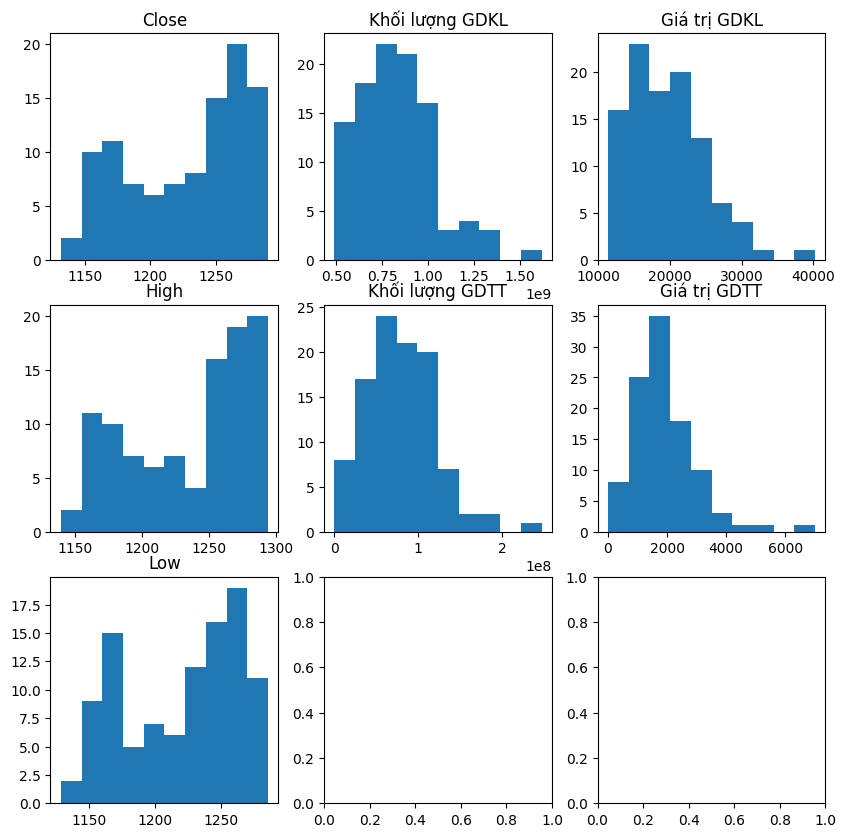

In [9]:
fig, axs = plt.subplots(3,3,figsize = (10,10))
#Plot histogram 
axs[0][0].hist(vni['CloseValue'])
axs[0][0].set_title('Close')
axs[1][0].hist(vni['HighValue'])
axs[1][0].set_title('High')
axs[2][0].hist(vni['LowValue'])
axs[2][0].set_title('Low')
axs[0][1].hist(vni['Volumn_trade'], bins=10)
axs[0][1].set_title('Khối lượng GDKL')
axs[0][2].hist(vni['Value_trade'])
axs[0][2].set_title('Giá trị GDKL')
axs[1][1].hist(vni['Volumn_agr'])
axs[1][1].set_title('Khối lượng GDTT')
axs[1][2].hist(vni['Value_agr'])
axs[1][2].set_title('Giá trị GDTT')

### Rolling mean & Standard deviation 


In [10]:
# Rolling mean
vni['Sh_rm'] = vni['CloseValue'].rolling(window=7).mean()
vni['Lg_rm'] = vni['CloseValue'].rolling(window=30).mean()

# Rolling standard
vni['Sh_rs'] = vni['CloseValue'].rolling(window=7).std()
vni['Lg_rs'] = vni['CloseValue'].rolling(window=30).std()

### Chỉ số RSI

In [11]:

delta = vni['CloseValue'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

# Tính trung bình lợi nhuận và mất mát
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

# Tính Relative Strength (RS)
rs = average_gain / average_loss

# Tính RSI
vni['RSI'] = 100 - (100 / (1 + rs))


### Chỉ số MACD

In [12]:

exp1 = vni['CloseValue'].ewm(span=12, adjust=False).mean()
exp2 = vni['CloseValue'].ewm(span=26, adjust=False).mean()
vni['MACD'] = exp1 - exp2
vni['Signal_Line'] = vni['MACD'].ewm(span=9, adjust=False).mean()


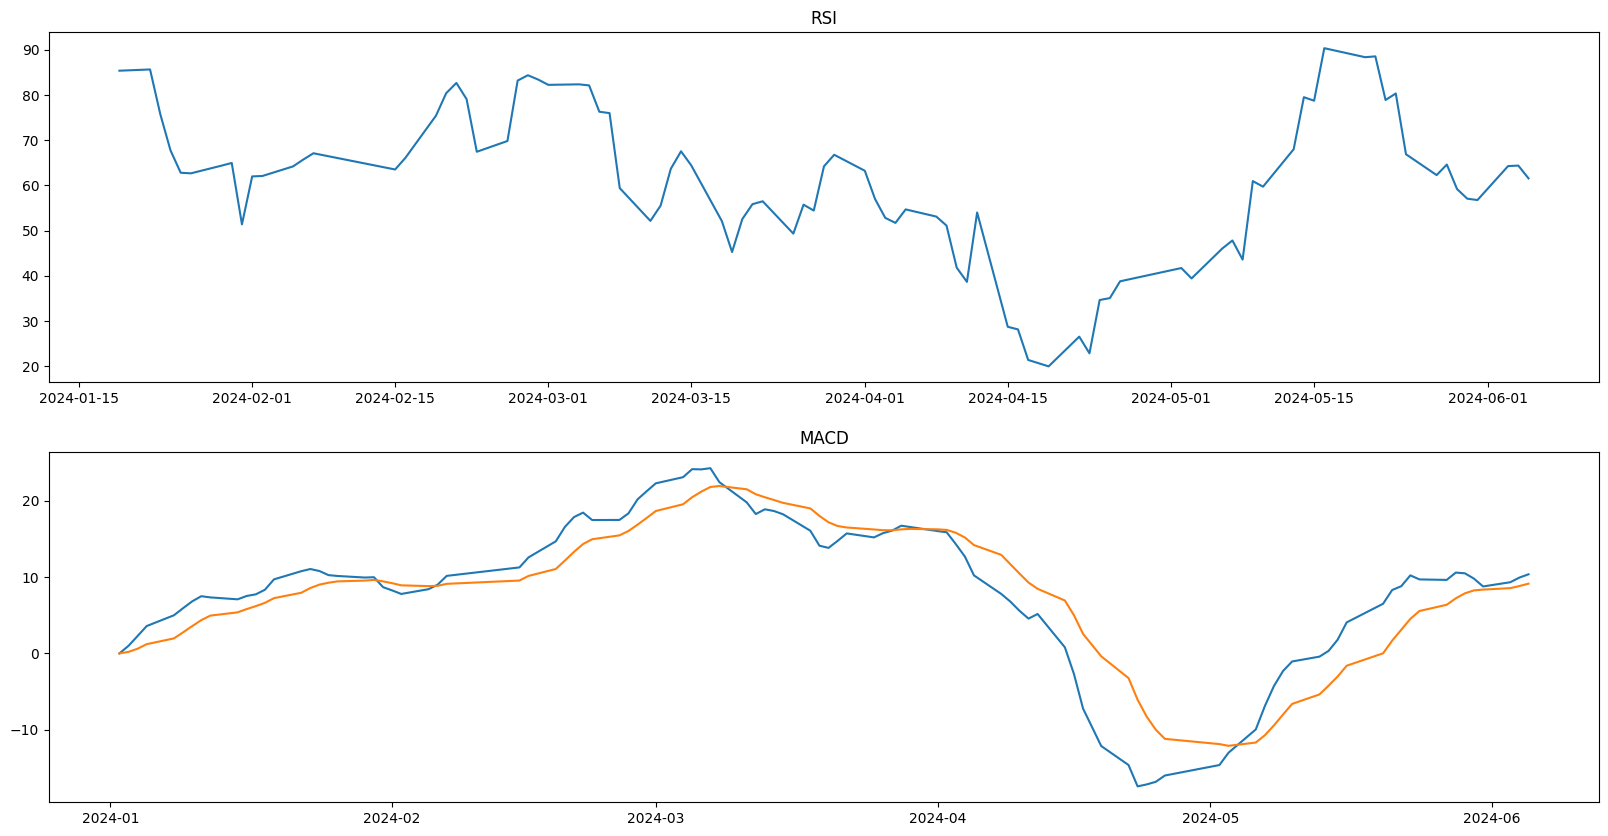

In [13]:
fig, ax = plt.subplots(2,1,figsize = (20,10))
ax[0].plot(vni['Date'], vni['RSI'], label = 'RSI')
ax[0].set_title('RSI')
ax[1].plot(vni['Date'], vni['MACD'], label = 'MACD')
ax[1].set_title('MACD')
ax[1].plot(vni['Date'], vni['Signal_Line'], label = 'Signal_Line')

In [14]:
vni.to_excel('VNI_new.xlsx')

### Line graph 


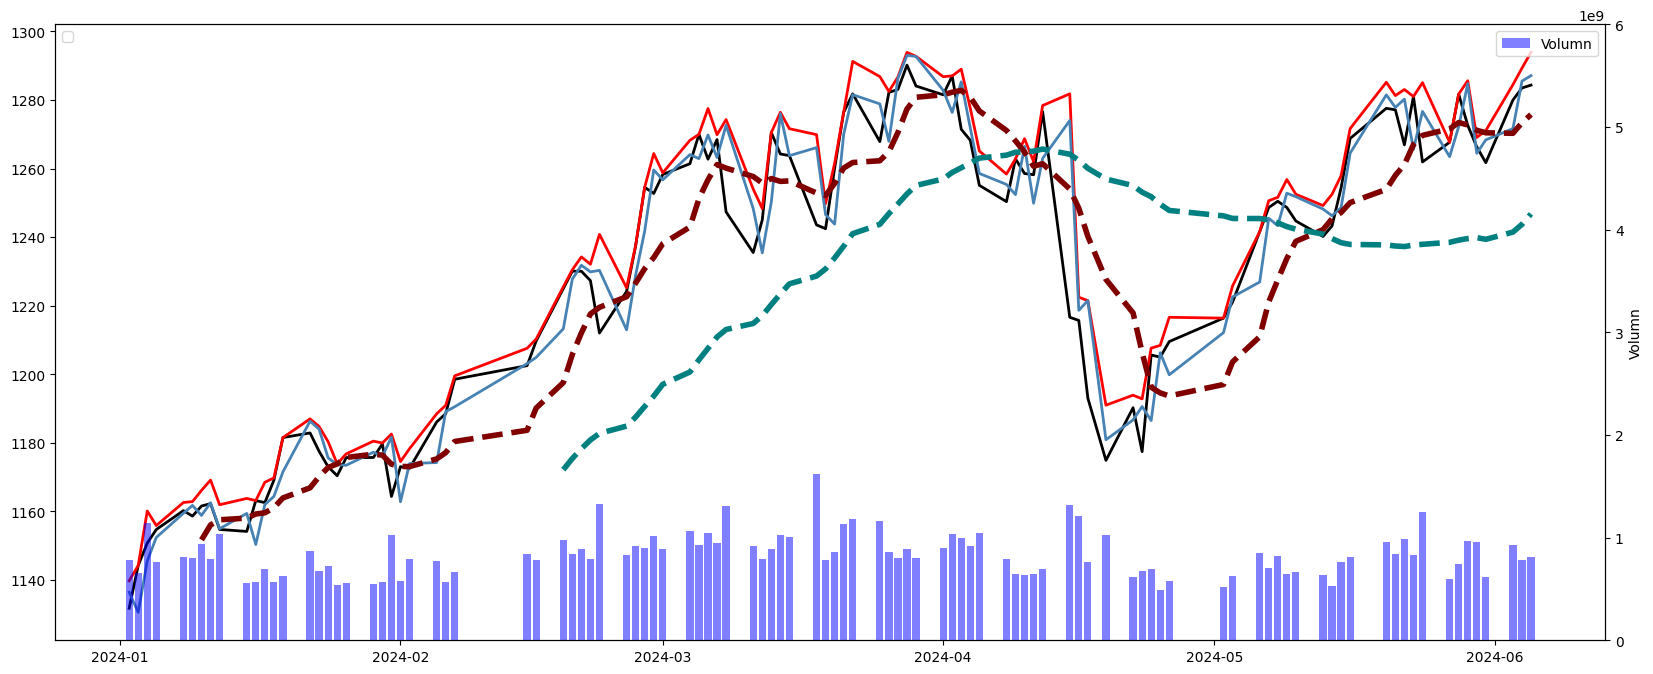

In [15]:
fig, ax1 = plt.subplots(figsize=(20,8))

#Plot line graph 
ax1.plot(vni['Date'], vni['CloseValue'], color = 'black',linewidth = 2)
ax1.plot(vni['Date'], vni['HighValue'], color = 'red', linewidth = 2)
ax1.plot(vni['Date'], vni['OpenValue'], color = 'steelblue', linewidth = 2)
#Plot the rolling mean and rolling standard
ax1.plot(vni['Date'],vni['Sh_rm'], color = 'maroon', linestyle = '--', linewidth = 4)
ax1.plot(vni['Date'],vni['Lg_rm'], color = 'teal', linestyle = '--', linewidth = 4)

# Plot the volumn bar 
## create the secondary axes
ax2 = ax1.twinx()
ax2.bar(vni['Date'], vni['Volumn_trade'], color='blue', alpha = 0.5, label = 'Volumn')
ax2.set_ylabel('Volumn')
ax2.set_ylim(0,6.0*pow(10,9))
# Adding the legend for both 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')




### Biểu đồ khối lượng giao dịch đầu tháng 4

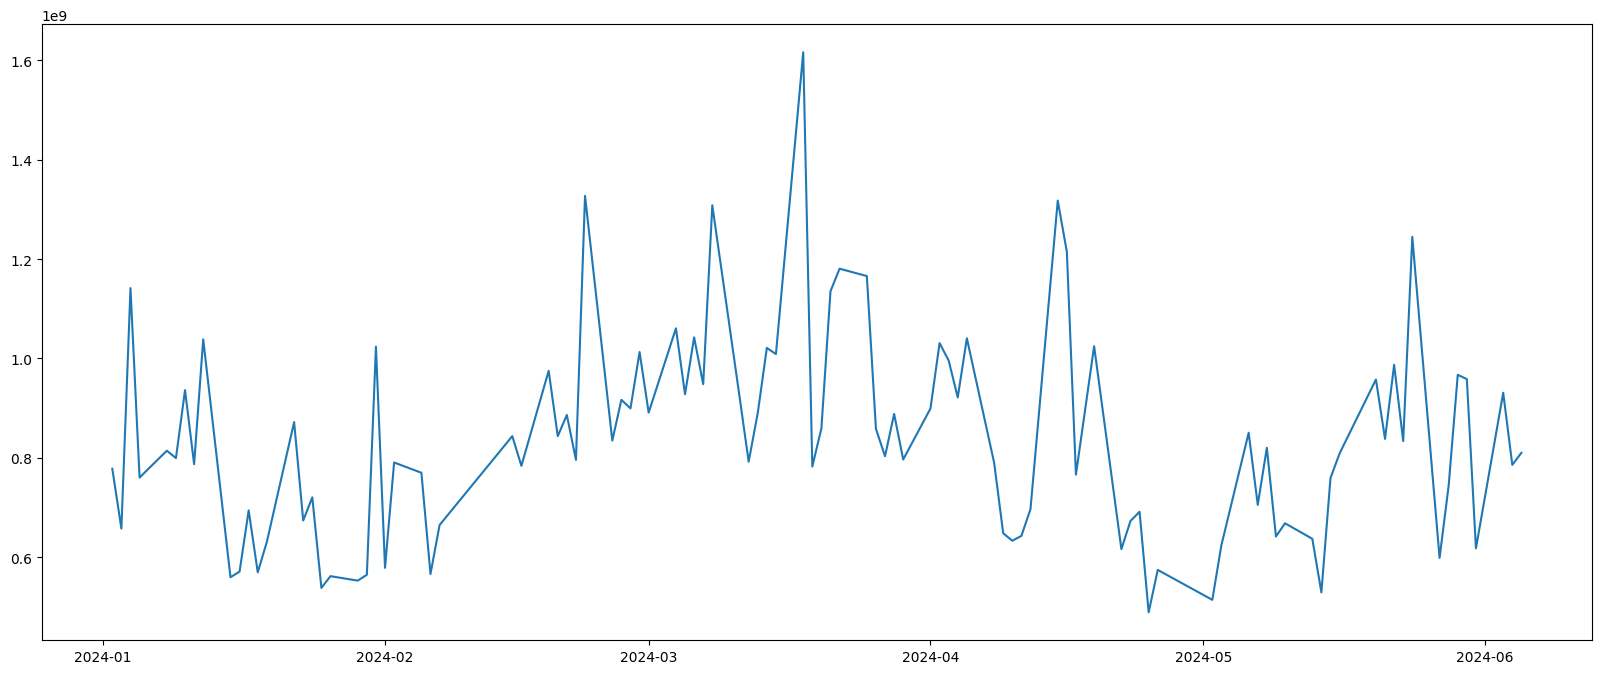

In [16]:
fig, ax = plt.subplots(1,1, figsize = (20,8))
ax.plot(vni['Date'], vni['Volumn_trade'])



### Biểu đồ Rolling Standard deviation 

Text(0.5, 1.0, 'Rolling standard deviation')

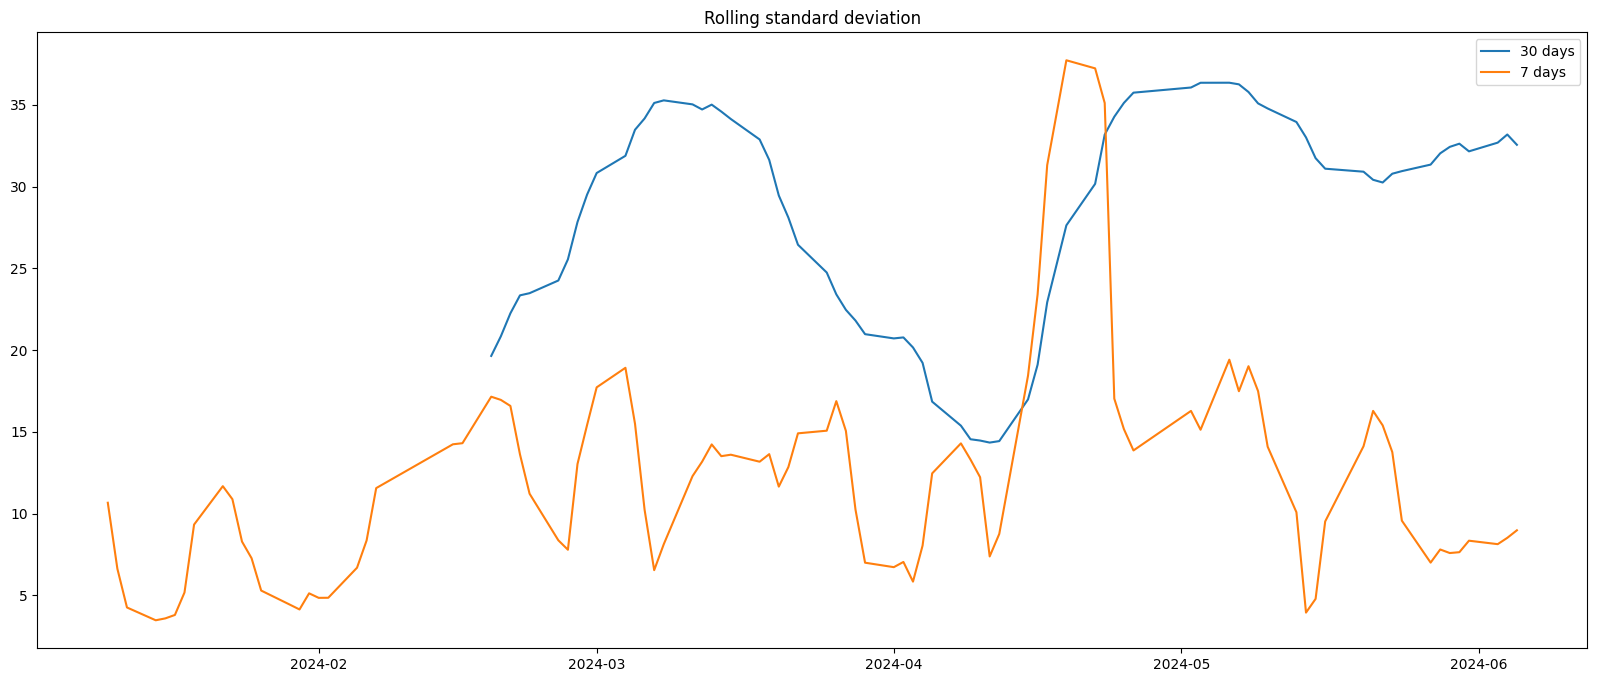

In [17]:
fig, ax = plt.subplots(1,1, figsize = (20,8))
ax.plot(vni['Date'], vni['Lg_rs'], label ='30 days')
ax.plot(vni['Date'], vni['Sh_rs'], label = '7 days')
ax.legend()
ax.set_title('Rolling standard deviation')

### Box plot


[]

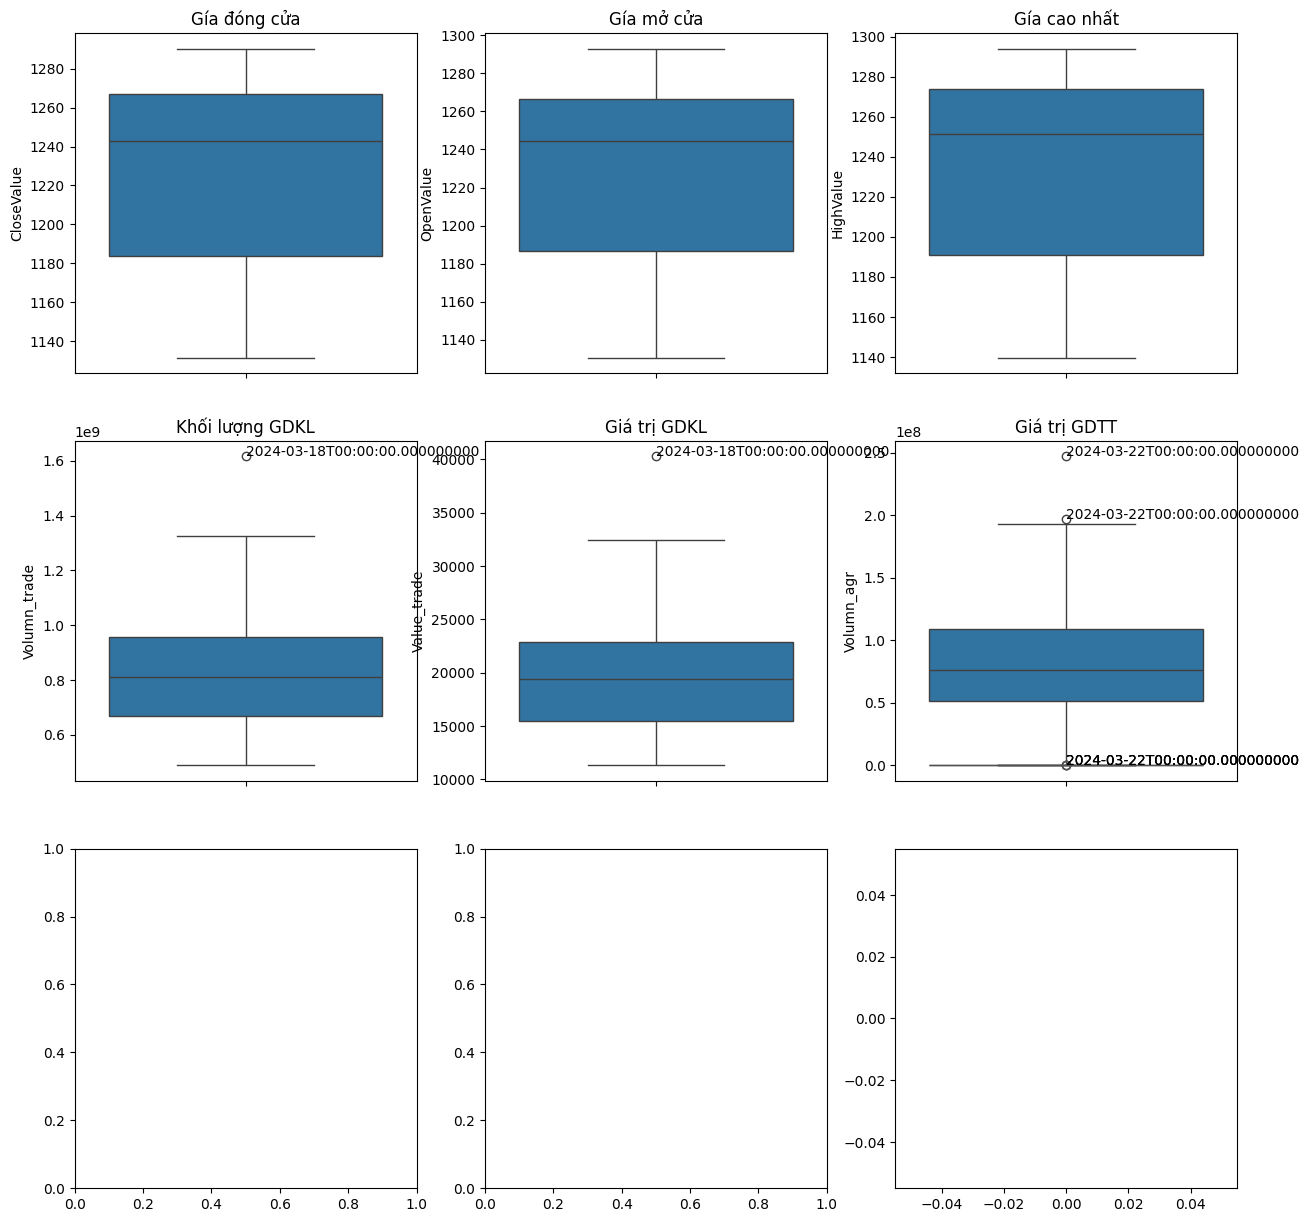

In [18]:
import matplotlib.pylab as plt
fig, ax1 = plt.subplots(3,3,figsize = (15,15))
#region Close
close_boxplot = sns.boxplot(y = vni['CloseValue'], ax = ax1[0][0])
close_boxplot.set_title('Gía đóng cửa')

# Calculate the IQR
Q1 = vni['CloseValue'].quantile(0.25)
Q3 = vni['CloseValue'].quantile(0.75)
IQR = Q3 - Q1

# Defind bounds for outlier
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

# Find outlier 
close_outlier = vni[(vni['CloseValue'] < lower_bound) | (vni['CloseValue'] > upper_bound)]

# Annotate outliers 
for i in close_outlier.index:
    close_boxplot.annotate('Outlier', xy = (0, close_outlier.iloc[i,'CloseValue']))
plt.plot()
#endregion
#region Open 
## Calculate the IQR
open_boxplot = sns.boxplot(y = vni['OpenValue'], ax = ax1[0][1])
open_boxplot.set_title('Gía mở cửa')

Q1 = vni['OpenValue'].quantile(0.25)
Q3 = vni['OpenValue'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
open_upper_bound = Q3 + 1.5*IQR
open_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
open_outlier = vni[(vni['OpenValue'] > open_upper_bound) | (vni['OpenValue'] < open_lower_bound)]

for i in open_outlier.index:
    open_boxplot.annotate('Outlier', xy =(0, open_outlier.loc[i, 'OpenValue']))
plt.plot()
#endregion
#region High 
## Calculate the IQR
high_boxplot = sns.boxplot(y = vni['HighValue'], ax = ax1[0][2])
high_boxplot.set_title('Gía cao nhất')

Q1 = vni['HighValue'].quantile(0.25)
Q3 = vni['HighValue'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
high_upper_bound = Q3 + 1.5*IQR
high_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
hi_outlier = vni[(vni['HighValue'] > high_upper_bound) | (vni['HighValue'] < high_lower_bound)]

for i in hi_outlier.index:
    high_boxplot.annotate('Outlier', xy =(0, hi_outlier.loc[i, 'HighValue']))
plt.plot()

#endregion
#region Volumn_trade 
## Calculate the IQR
vol_trd_boxplot = sns.boxplot(y = vni['Volumn_trade'], ax = ax1[1][0])
vol_trd_boxplot.set_title('Khối lượng GDKL')

Q1 = vni['Volumn_trade'].quantile(0.25)
Q3 = vni['Volumn_trade'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
vol_trd_upper_bound = Q3 + 1.5*IQR
vol_trd_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
vol_trd_outlier = vni[(vni['Volumn_trade'] > vol_trd_upper_bound) | (vni['Volumn_trade'] < vol_trd_lower_bound)]

for i in vol_trd_outlier.index:
    vol_trd_boxplot.annotate(vol_trd_outlier['Date'].values[0], xy =(0, vol_trd_outlier.loc[i, 'Volumn_trade']))
plt.plot()
#endregion
#region Value_trade
## Calculate the IQR
val_trd_boxplot = sns.boxplot(y = vni['Value_trade'], ax = ax1[1][1])
val_trd_boxplot.set_title('Giá trị GDKL')

Q1 = vni['Value_trade'].quantile(0.25)
Q3 = vni['Value_trade'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
val_trd_upper_bound = Q3 + 1.5*IQR
val_trd_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
val_trd_outlier = vni[(vni['Value_trade'] > val_trd_upper_bound) | (vni['Value_trade'] < val_trd_lower_bound)]

for i in val_trd_outlier.index:
    val_trd_boxplot.annotate(val_trd_outlier['Date'].values[0], xy =(0, val_trd_outlier.loc[i, 'Value_trade']))
plt.plot()
#endregion
#region Volumn_agr
## Calculate the IQR
vol_arg_boxplot = sns.boxplot(y = vni['Volumn_agr'], ax = ax1[1][2])
vol_arg_boxplot.set_title('Giá trị GDKL')

Q1 = vni['Volumn_agr'].quantile(0.25)
Q3 = vni['Volumn_agr'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
vol_agr_upper_bound = Q3 + 1.5*IQR
vol_agr_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
vol_agr_outlier = vni[(vni['Volumn_agr'] > vol_agr_upper_bound) | (vni['Volumn_agr'] < vol_agr_lower_bound)]

for i in vol_agr_outlier.index:
    vol_arg_boxplot.annotate(vol_agr_outlier['Date'].values[0], xy =(0, vol_agr_outlier.loc[i, 'Volumn_agr']))
plt.plot()
#endregion
#region Value_agr
## Calculate the IQR
val_arg_boxplot = sns.boxplot(y = vni['Value_agr'], ax = ax1[1][2])
val_arg_boxplot.set_title('Giá trị GDTT')

Q1 = vni['Value_agr'].quantile(0.25)
Q3 = vni['Value_agr'].quantile(0.75)
IQR = Q3 - Q1
## Cal the bounds
val_agr_upper_bound = Q3 + 1.5*IQR
val_agr_lower_bound = Q1 - 1.5*IQR
## Annotate the outlier
val_agr_outlier = vni[(vni['Value_agr'] > val_agr_upper_bound) | (vni['Value_agr'] < val_agr_lower_bound)]

for i in val_agr_outlier.index:
    val_arg_boxplot.annotate(val_agr_outlier['Date'].values[0], xy =(0, val_agr_outlier.loc[i, 'Value_agr']))
plt.plot()
#endregion


### 

## 2. Time series EDA

### TS decomposition 


Text(0.5, 1.0, 'VNI Residuall (Period = 7)')

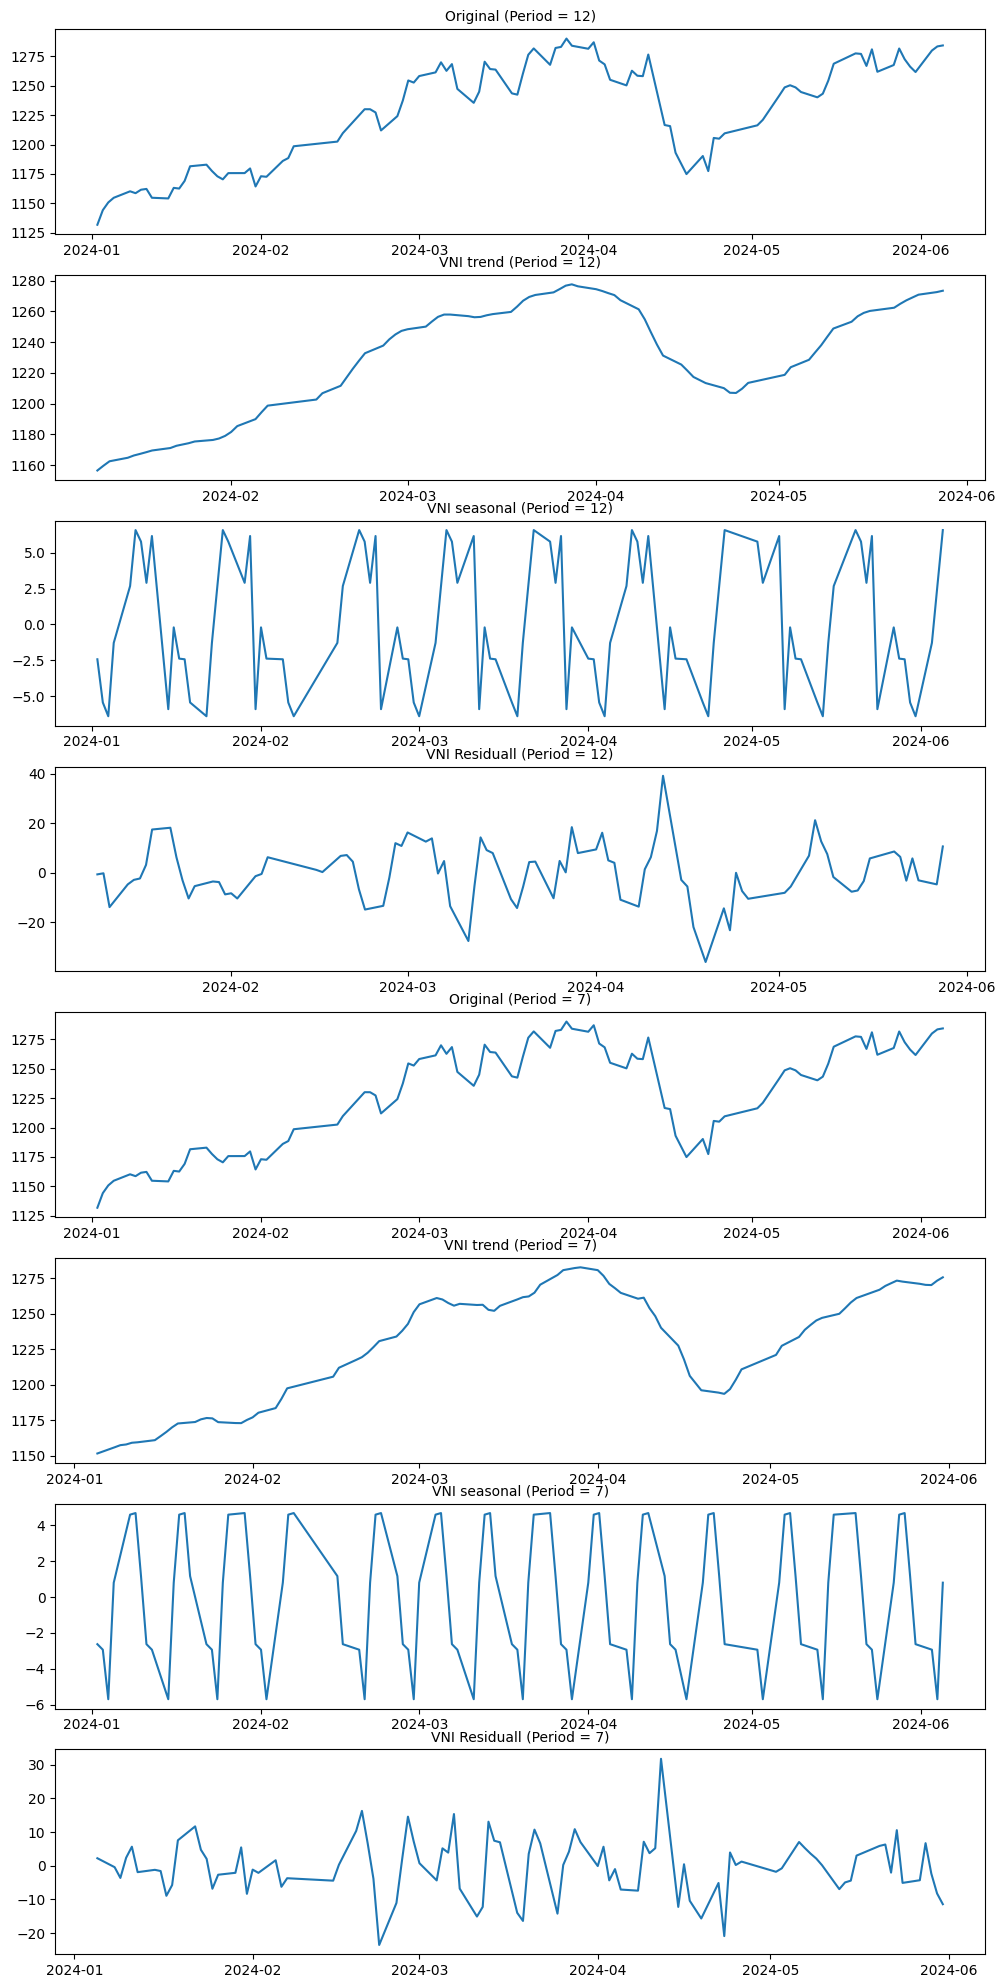

In [19]:
# period  = 12 
vni_decom_monthly = seasonal_decompose(vni['CloseValue'], model='additive', period=12) 
# period = 7
vni_decom_weekly  = seasonal_decompose(vni['CloseValue'], model= 'additive', period= 7)

#plot vni_decom_monthly 
# Plot the decomposed components
fig, ax = plt.subplots(8,1,figsize = (12,25))
#Original timeseries
ax[0].plot(vni['Date'],vni['CloseValue'], label = 'Original')
ax[0].set_title('Original (Period = 12)',fontsize = 10)
#Trend vni in 12 month
ax[1].plot(vni['Date'],vni_decom_monthly.trend, label = 'Trend')
# ax[1].legend()
ax[1].set_title('VNI trend (Period = 12)',fontsize = 10)
#Seasonal vni  in 12 month 
ax[2].plot(vni['Date'],vni_decom_monthly.seasonal, label = 'Seasonal')
# ax[2].legend()
ax[2].set_title('VNI seasonal (Period = 12)',fontsize = 10)
#Residual vni in 12 month 
ax[3].plot(vni['Date'],vni_decom_monthly.resid, label = 'Residual')
# ax[3].legend()
ax[3].set_title('VNI Residuall (Period = 12)',fontsize = 10)

# Weekly 
#Original timeseries
ax[4].plot(vni['Date'],vni['CloseValue'], label = 'Original')
ax[4].set_title('Original (Period = 7)',fontsize = 10)
#Trend vni in 7 month
ax[5].plot(vni['Date'],vni_decom_weekly.trend, label = 'Trend')
# ax[5].legend()
ax[5].set_title('VNI trend (Period = 7)',fontsize = 10)
#Seasonal vni  in 7 month 
ax[6].plot(vni['Date'],vni_decom_weekly.seasonal, label = 'Seasonal')
# ax[6].legend()
ax[6].set_title('VNI seasonal (Period = 7)',fontsize = 10)
#Residual vni in 7 month 
ax[7].plot(vni['Date'],vni_decom_weekly.resid, label = 'Residual')
# ax[7].legend()
ax[7].set_title('VNI Residuall (Period = 7)',fontsize = 10)



#### Thông tin sơ bộ:
- Mô hình có tính mùa rõ ràng và xu hướng chung là tăng theo thời gian  
- Thành phần dư có thể thuộc nhóm ARCH có phương sai thay đổi theo thời gian
- 


### Ma trận hệ số tương quan

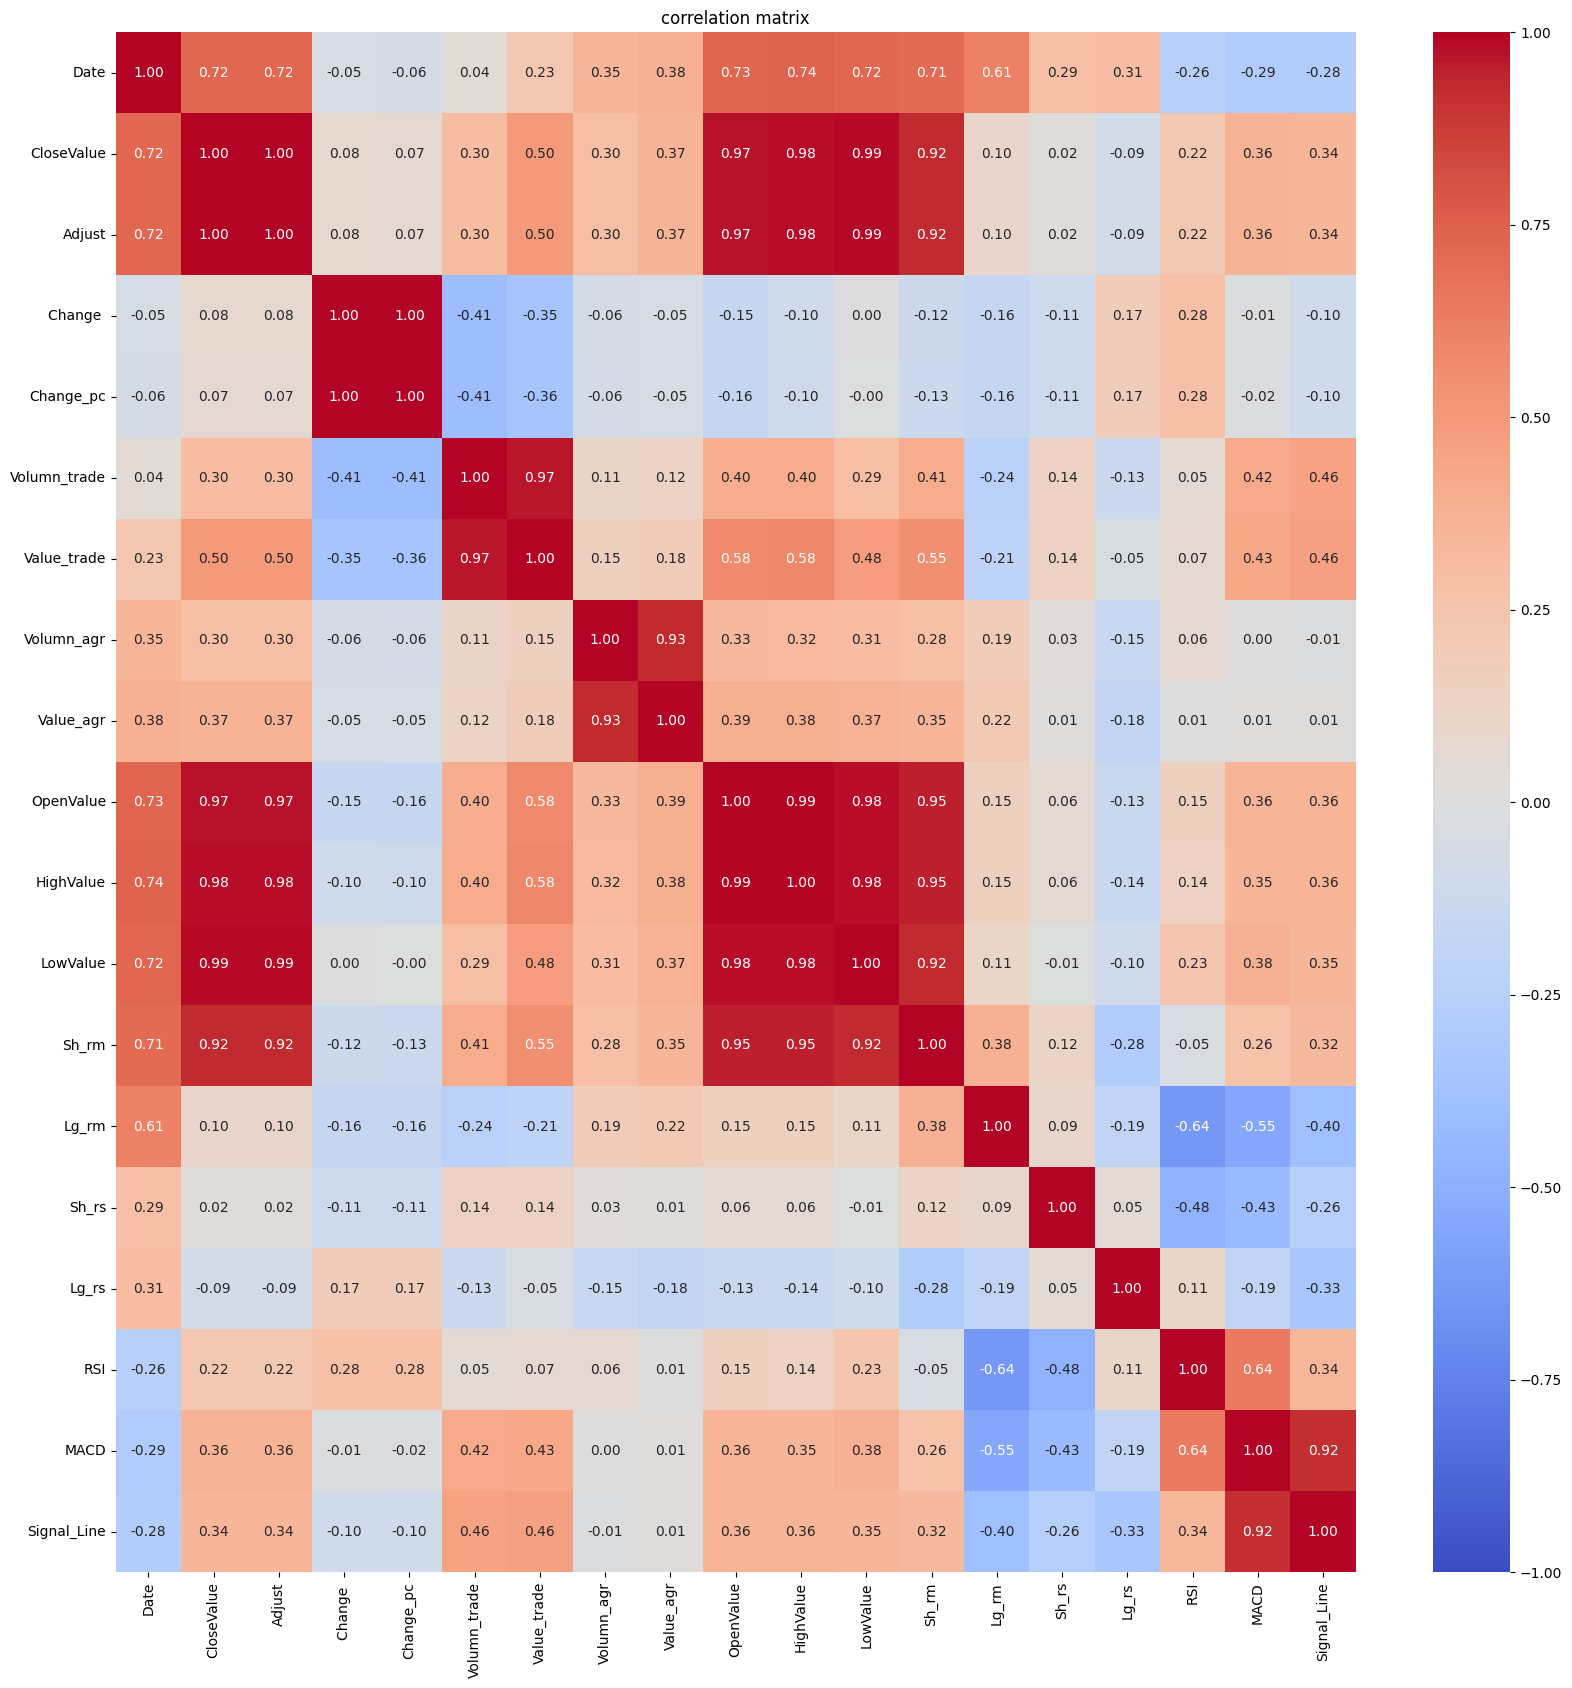

In [20]:
vni_corr_matrix = pd.read_excel('VNI_new.xlsx')

plt.figure(figsize=(20,20))
vni_corr_matrix = vni.corr()

# Draw the heat map 
# Visual the correlation matrix 
sns.heatmap(vni_corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm', vmin = -1, vmax=1)
plt.title('correlation matrix')
plt.show()


#### Tổng quan:
- Close tương có quan với TradeValue (0.5)
- Close tương quan mạnh với giá mở cửa, đóng cửa, giá cáo nhất.
- Value trade tương quan với giá mở cửa


### Merge các chỉ số khác như SP500 và Dow 

In [21]:
dow = pd.read_excel('Dow.xlsx')
dow.dtypes


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [22]:
sp = pd.read_excel('SP500.xlsx')
sp.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [23]:
megre_file = pd.merge(vni,dow, on ='Date')
megre_file_1 = pd.merge(megre_file,sp, on = 'Date')

megre_file_1.to_excel('summery.xlsx')

### Ma trận hệ số tương quan sau khi ghép file


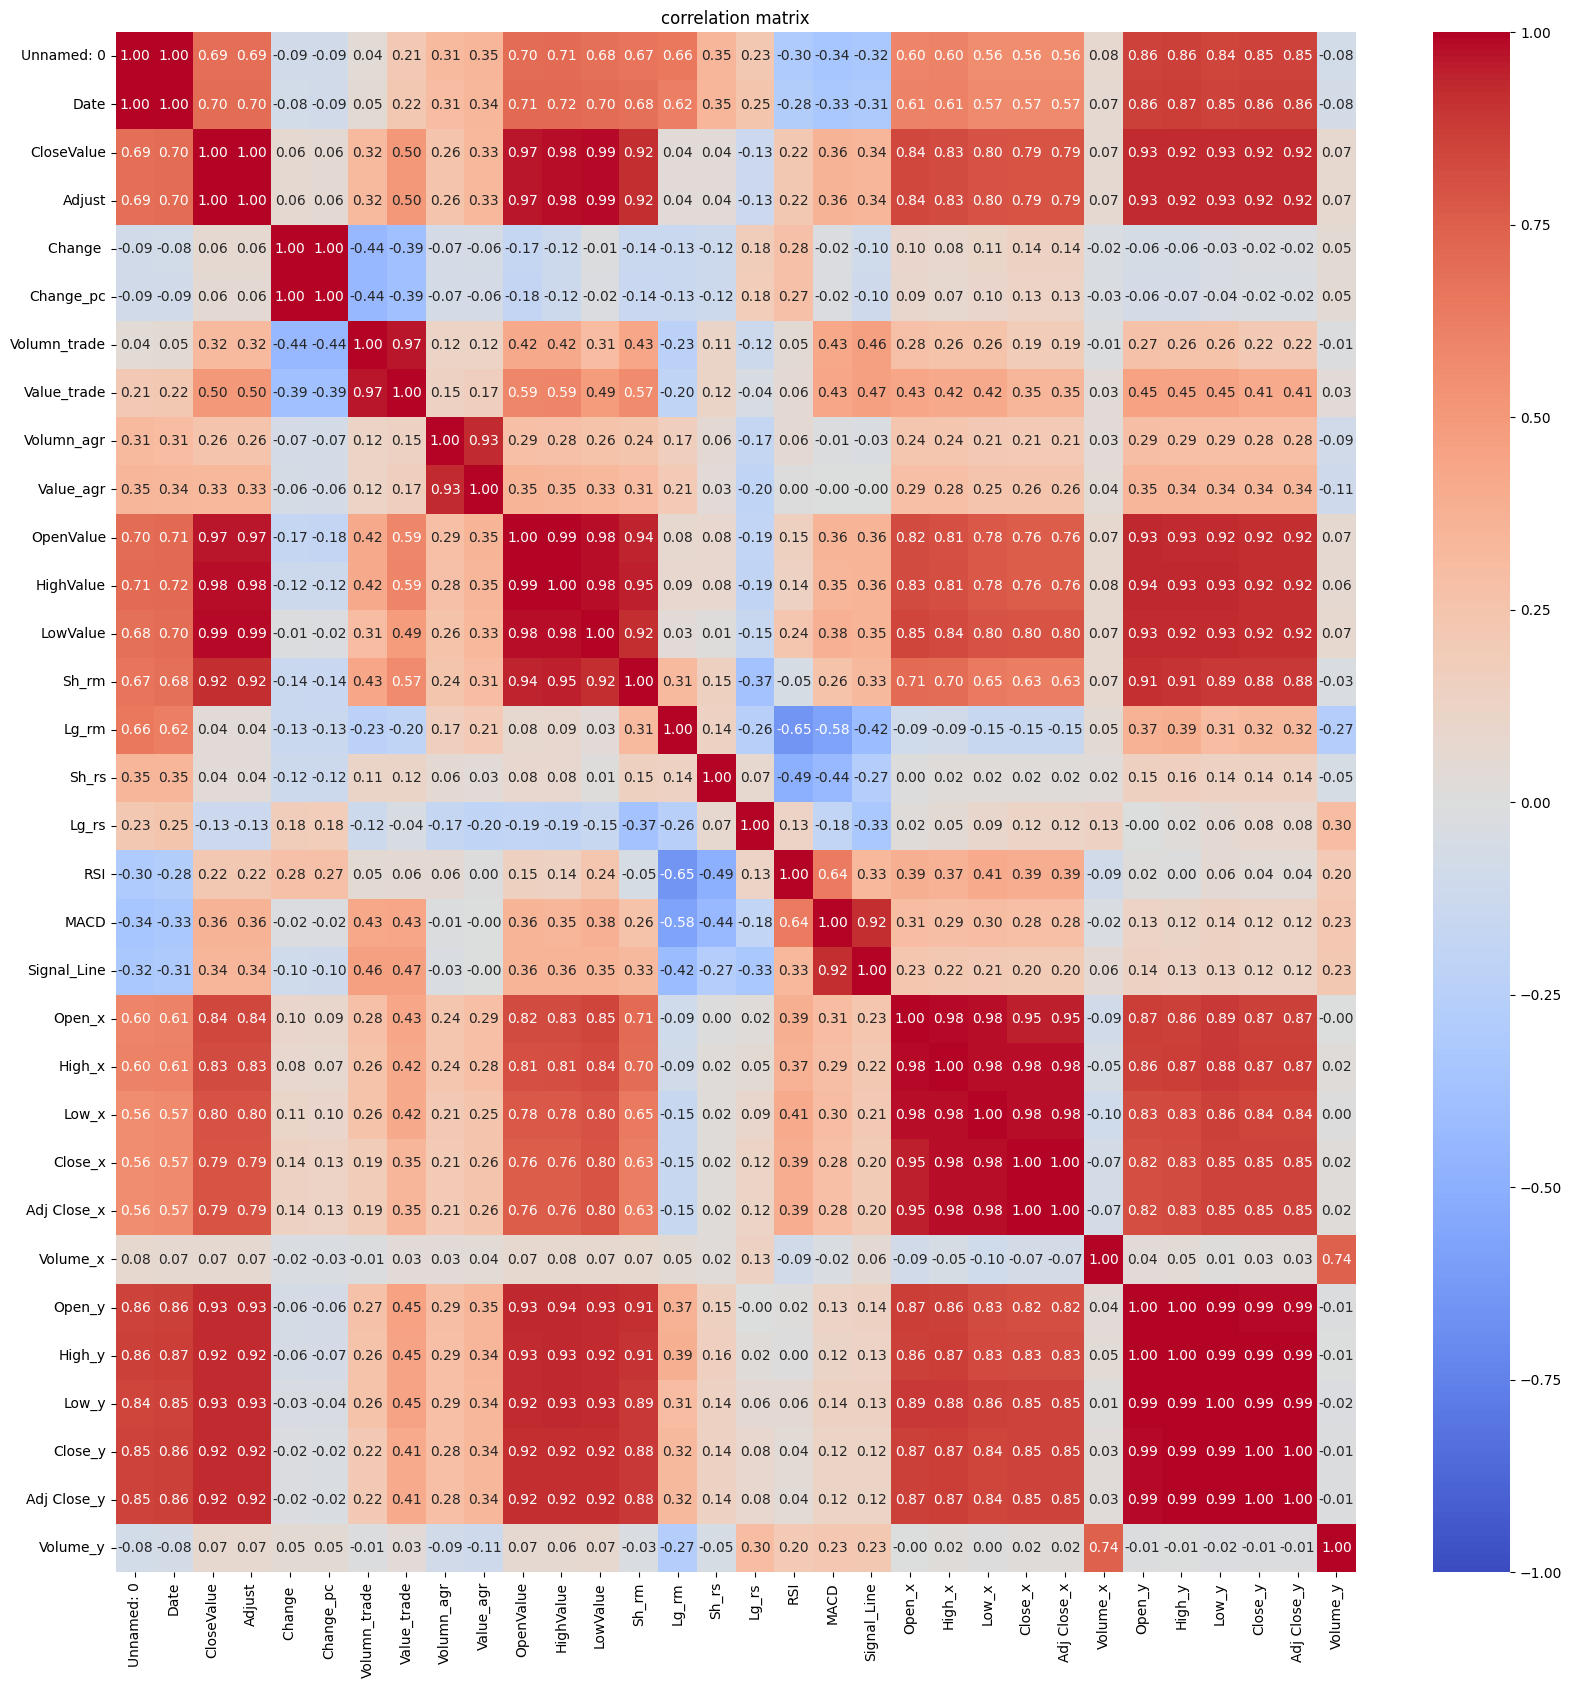

In [24]:
file_sum  = pd.read_excel('summery.xlsx')

plt.figure(figsize=(20,20))
file_sum = file_sum.corr()

# Draw the heat map 
# Visual the correlation matrix 
sns.heatmap(file_sum, annot=True, fmt = '.2f', cmap='coolwarm', vmin = -1, vmax=1)
plt.title('correlation matrix')
plt.show()


### Kết luận:
- Biến mục tiêu: CloseValue - giá đóng cửa VNINDEX
- Biến: 
    - ValueTrade: Giá trị giao dịch khớp lệnh - Mức độ tương quan 0.5 
    - Sh_rm: Đường Rolling mean (MA) window size = 7 
    - LowValue: Giá trị thấp nhất 
    - CloseDOW: Giá đóng cửa DOWJones
    - CloseSP: Giá đóng cửa thị trường S&P500

## Áp dụng các mô hình đơn biến

### Dự báo ngắn hạn 

Text(0.5, 1.0, 'VNI Residuall (Period = 7)')

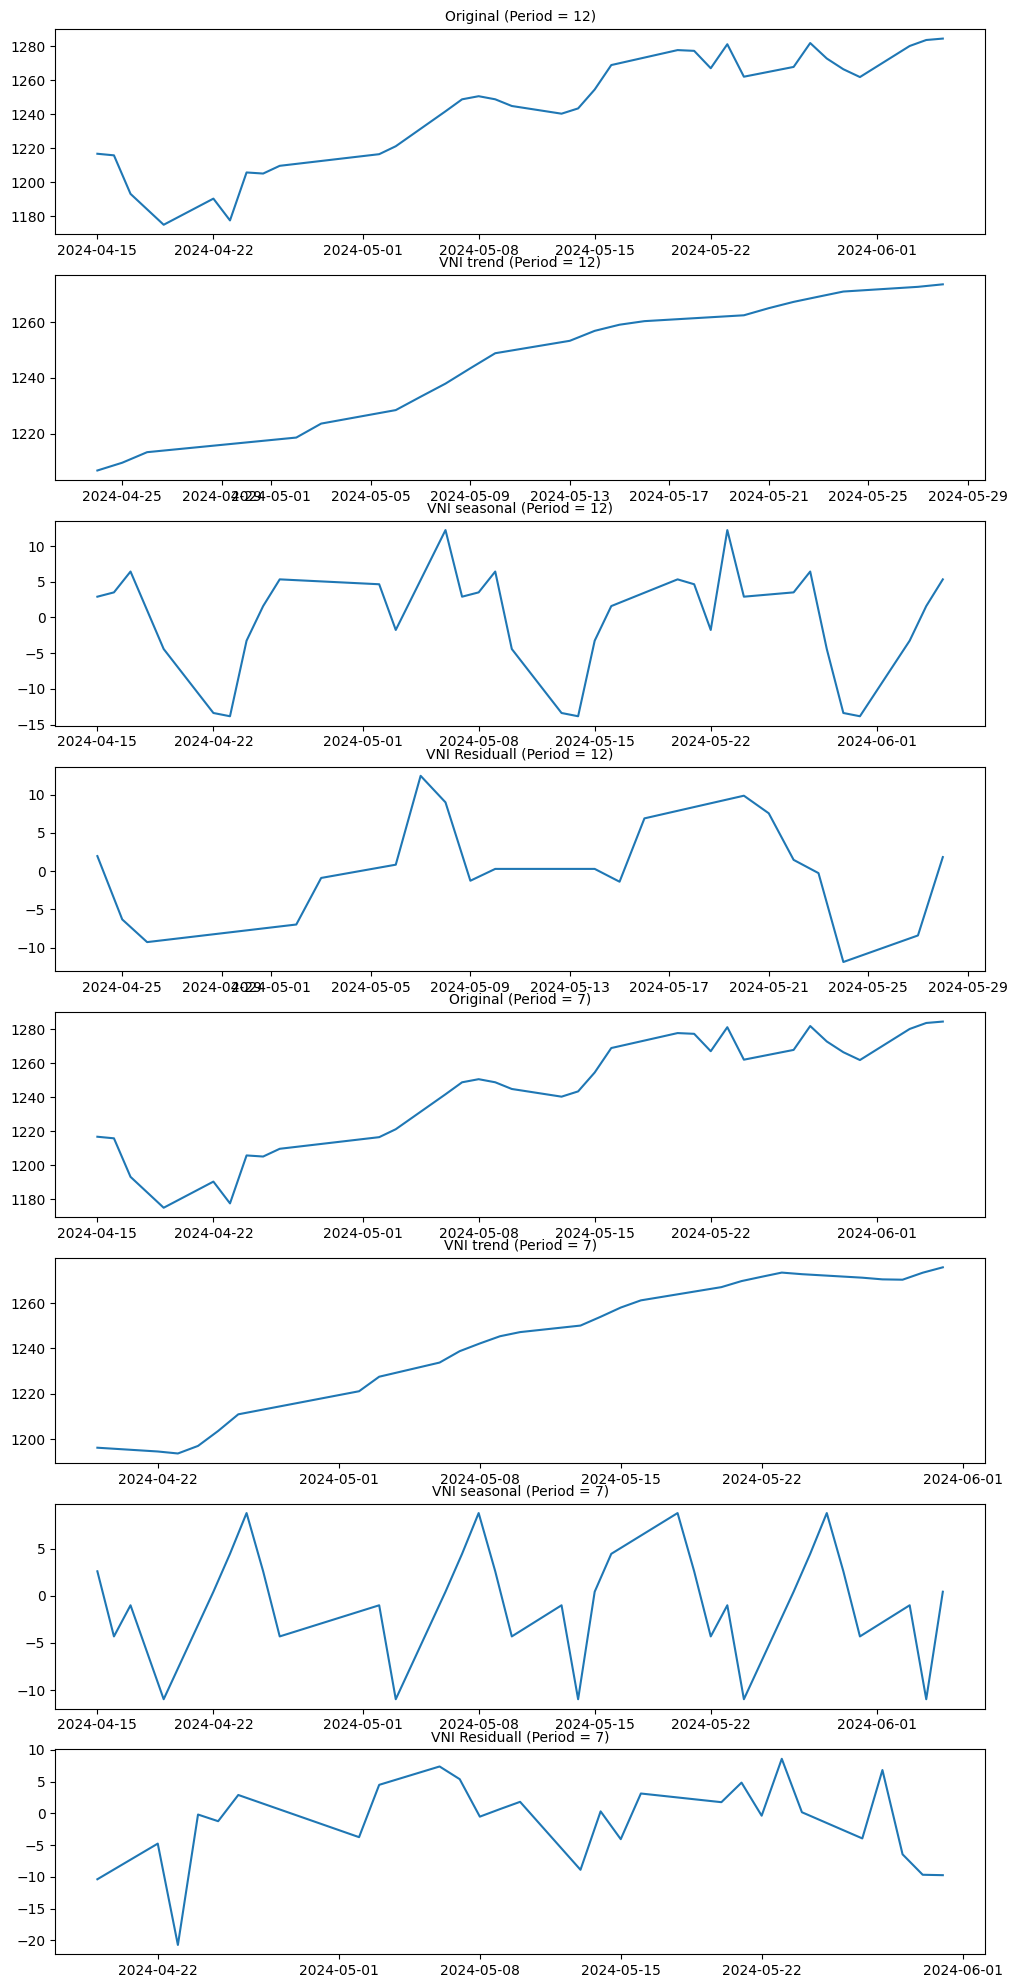

In [25]:
# Lấy dữ liệu từ đầu trend cuối tháng 4 
start_date = '2024-04-15'
vni_close = vni[vni['Date'] >= start_date]
# period  = 12 
vni_close_month = seasonal_decompose(vni_close['CloseValue'], model='additive', period=12) 
# period = 7
vni_close_weekly  = seasonal_decompose(vni_close['CloseValue'], model= 'additive', period= 7)

#plot vni_decom_monthly 
# Plot the decomposed components
fig, ax = plt.subplots(8,1,figsize = (12,25))
#Original timeseries
ax[0].plot(vni_close['Date'],vni_close['CloseValue'], label = 'Original')
ax[0].set_title('Original (Period = 12)',fontsize = 10)
#Trend vni in 12 month
ax[1].plot(vni_close['Date'],vni_close_month.trend, label = 'Trend')
# ax[1].legend()
ax[1].set_title('VNI trend (Period = 12)',fontsize = 10)
#Seasonal vni  in 12 month 
ax[2].plot(vni_close['Date'],vni_close_month.seasonal, label = 'Seasonal')
# ax[2].legend()
ax[2].set_title('VNI seasonal (Period = 12)',fontsize = 10)
#Residual vni in 12 month 
ax[3].plot(vni_close['Date'],vni_close_month.resid, label = 'Residual')
# ax[3].legend()
ax[3].set_title('VNI Residuall (Period = 12)',fontsize = 10)

# Weekly 
#Original timeseries
ax[4].plot(vni_close['Date'],vni_close['CloseValue'], label = 'Original')
ax[4].set_title('Original (Period = 7)',fontsize = 10)
#Trend vni in 7 month
ax[5].plot(vni_close['Date'],vni_close_weekly.trend, label = 'Trend')
# ax[5].legend()
ax[5].set_title('VNI trend (Period = 7)',fontsize = 10)
#Seasonal vni  in 7 month 
ax[6].plot(vni_close['Date'],vni_close_weekly.seasonal, label = 'Seasonal')
# ax[6].legend()
ax[6].set_title('VNI seasonal (Period = 7)',fontsize = 10)
#Residual vni in 7 month 
ax[7].plot(vni_close['Date'],vni_close_weekly.resid, label = 'Residual')
# ax[7].legend()
ax[7].set_title('VNI Residuall (Period = 7)',fontsize = 10)



### Tổng quan 
- Uptrend   
- Seasonal
- 

### Check stationary

In [26]:
from statsmodels.tsa.stattools import adfuller  

# Kiem dinh tinh dung 
result = adfuller(vni_close['CloseValue'])

#show ket qua 
print(f'ADF Statistic: {result[0]}' )
print(f'p-value: {result[1]}')
print(f'Critical value: ')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -0.7621047953812542
p-value: 0.8300009169397715
Critical value: 
1%: -3.653519805908203
5%: -2.9572185644531253
10%: -2.6175881640625


### Kết luận:
- Chuỗi đã cho là không dừng


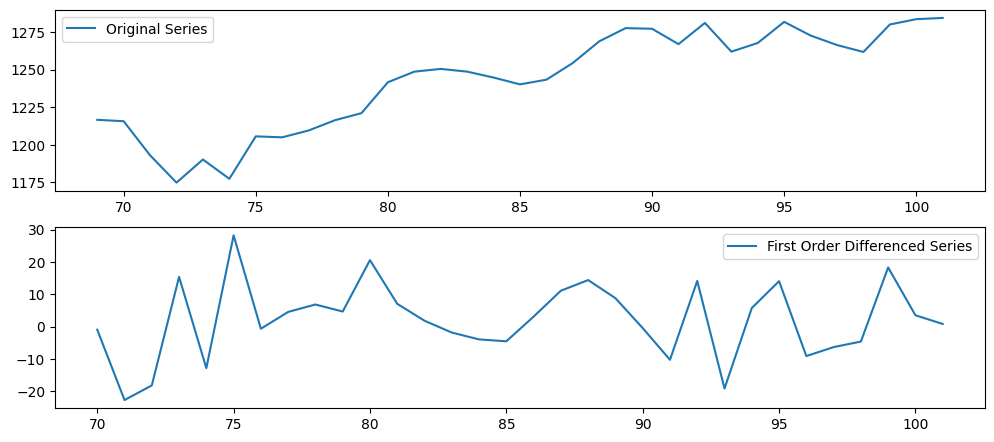

ADF Statistic: -5.957033290893936
p-value: 2.0814555306273225e-07
Critical value: 
1%: -3.661428725118324
5%: -2.960525341210433
10%: -2.6193188033298647


In [27]:
# Assuming 'data' is your pandas DataFrame and 'series' is the column of interest
series = vni_close['CloseValue']
# First Order Differencing
diff_series = series.diff().dropna()
# Plotting to visualize the transformation
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(series, label='Original Series')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(diff_series, label='First Order Differenced Series')
plt.legend(loc='best')

plt.show()
result = adfuller(diff_series)
#show ket qua 
print(f'ADF Statistic: {result[0]}' )
print(f'p-value: {result[1]}')
print(f'Critical value: ')
for key, value in result[4].items():
    print(f'{key}: {value}')


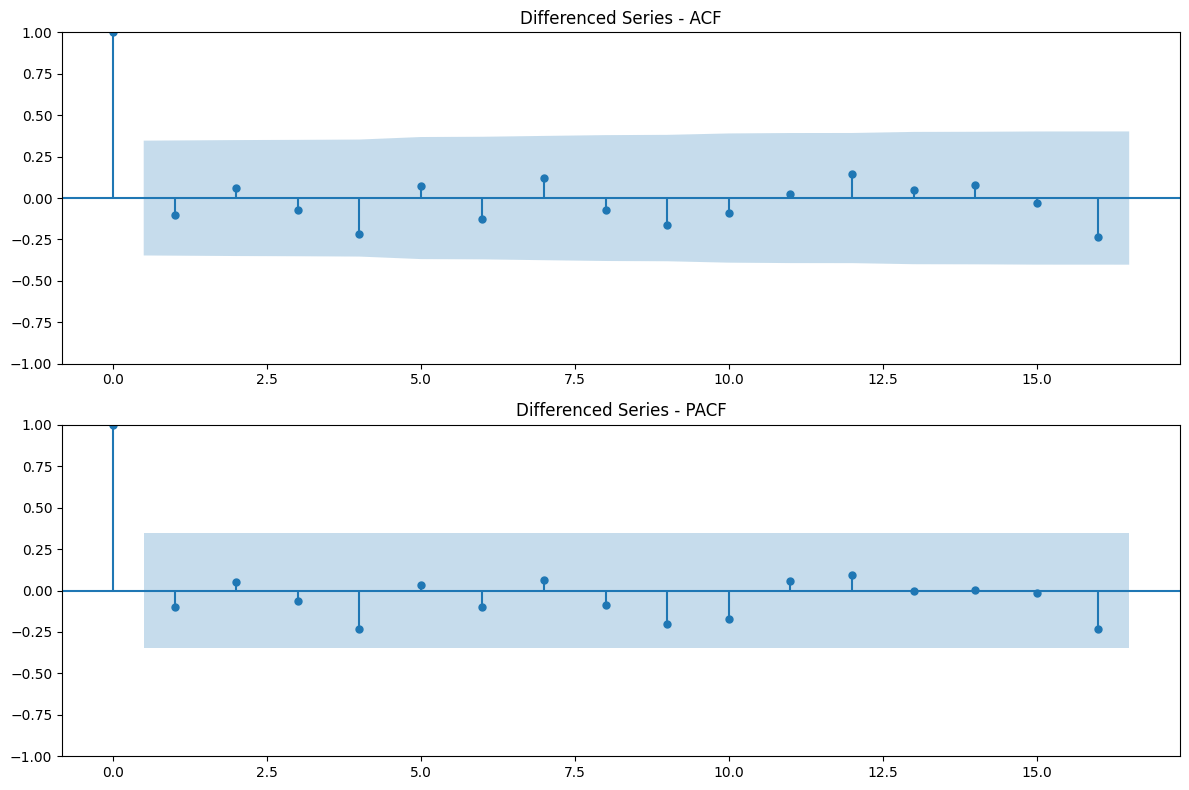

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced series (or stationary series)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(diff_series, ax=axes[0])
axes[0].set_title('Differenced Series - ACF')

# PACF plot
plot_pacf(diff_series, ax=axes[1])
axes[1].set_title('Differenced Series - PACF')

plt.tight_layout()
plt.show()


In [29]:
# Chia tập train và test
# Convert the relevant columns to numeric and split the data into training and testing sets
train = pd.to_numeric(vni_close['CloseValue'].iloc[:25], errors='coerce').dropna()
test = pd.to_numeric(vni_close['CloseValue'].iloc[25:], errors='coerce').dropna()
len(test)

8

####

In [30]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame and 'series' is the column of interest
series = train

# Use auto_arima to find the best model
model = pm.auto_arima(series, 
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      seasonal=True,  # change to True if you have seasonal data
                      d=None,           # let auto_arima find the optimal d
                      trace=True,       # print the process
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# Print the summary of the best model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=196.111, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=192.671, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=194.465, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=194.525, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=191.228, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.090 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -94.614
Date:                Mon, 17 Jun 2024   AIC                            191.228
Time:                        22:53:40   BIC                            192.406
Sample:                             0   HQIC                           191.540
                                 - 25                                         
Co

### Mô hình AR

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\s

<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x0000015C7A2EF050>>


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Predic

                               SARIMAX Results                                
Dep. Variable:             CloseValue   No. Observations:                   25
Model:                ARIMA(16, 1, 0)   Log Likelihood                 -75.832
Date:                Mon, 17 Jun 2024   AIC                            185.663
Time:                        22:53:42   BIC                            205.690
Sample:                             0   HQIC                           190.976
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8114      1.774     -0.457      0.647      -4.288       2.665
ar.L2          0.7228      0.341      2.122      0.034       0.055       1.390
ar.L3          1.0645      3.373      0.316      0.7

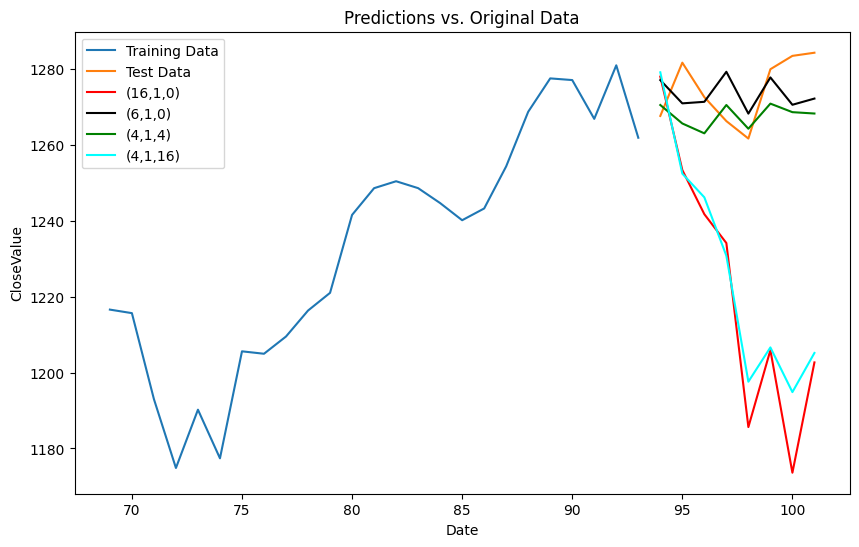

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Fit the ARIMA model on the training set
model_1 = ARIMA(train, order=(16,1,0))
model_2 = ARIMA(train, order=(6,1,0))
model_3 = ARIMA(train, order=(4,1,0))
model_4 = ARIMA(train, order=(16,1,16))

seasonal_order = (1, 1, 1, 12)

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order)
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary)


fitted_model_1 = model_1.fit()
fitted_model_2 = model_2.fit()
fitted_model_3 = model_3.fit()
fitted_model_4 = model_4.fit()




# Print the model summary
print(fitted_model_1.summary())
print(fitted_model_2.summary())
print(fitted_model_3.summary())
print(fitted_model_4.summary())
# Forecast values for the test set
n_forecast = len(test)
forecast_1 = fitted_model_1.forecast(steps=n_forecast)
forecast_2 = fitted_model_2.forecast(steps=n_forecast)
forecast_3 = fitted_model_3.forecast(steps=n_forecast)
forecast_4 = fitted_model_4.forecast(steps=n_forecast)



def calculate_metrics(test, forecast):
    mse = mean_squared_error(test, forecast)
    r2 = r2_score(test, forecast)
    mape = np.mean(np.abs((test - forecast) / test)) * 100
    return mse, r2, mape

mse_1, r2_1, mape_1 = calculate_metrics(test, forecast_1)
mse_2, r2_2, mape_2 = calculate_metrics(test, forecast_2)
mse_3, r2_3, mape_3 = calculate_metrics(test, forecast_3)
mse_4, r2_4, mape_4 = calculate_metrics(test, forecast_4)

# Print the metrics
print(f"Model (16,1,0) - MSE: {mse_1}, R2: {r2_1}")
print(f"Model (6,1,0) - MSE: {mse_2}, R2: {r2_2}")
print(f"Model (4,1,4) - MSE: {mse_3}, R2: {r2_3}")
print(f"Model (16,1,4) - MSE: {mse_4}, R2: {r2_4}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_1, color='red', label='(16,1,0)')
plt.plot(test.index, forecast_2, color='black', label='(6,1,0)')
plt.plot(test.index, forecast_3, color='green', label='(4,1,4)')
plt.plot(test.index, forecast_4, color='cyan', label='(4,1,16)')
plt.title('Predictions vs. Original Data')
plt.xlabel('Date')
plt.ylabel('CloseValue')
plt.legend()
plt.show()


In [32]:

seasonal_order = (1, 1, 1, 12)

model = SARIMAX(train, order=(4, 1, 4), seasonal_order=seasonal_order)
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())
# Forecast values for the test set
n_forecast = len(test)
forecast = fitted_model.forecast(steps=n_forecast)



c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All 

                                      SARIMAX Results                                       
Dep. Variable:                           CloseValue   No. Observations:                   25
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 12)   Log Likelihood                 -44.511
Date:                              Mon, 17 Jun 2024   AIC                            111.022
Time:                                      22:53:43   BIC                            116.355
Sample:                                           0   HQIC                           109.047
                                               - 25                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9128      6.518      0.140      0.889     -11.863      13.689
ar.L2         -0.18

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


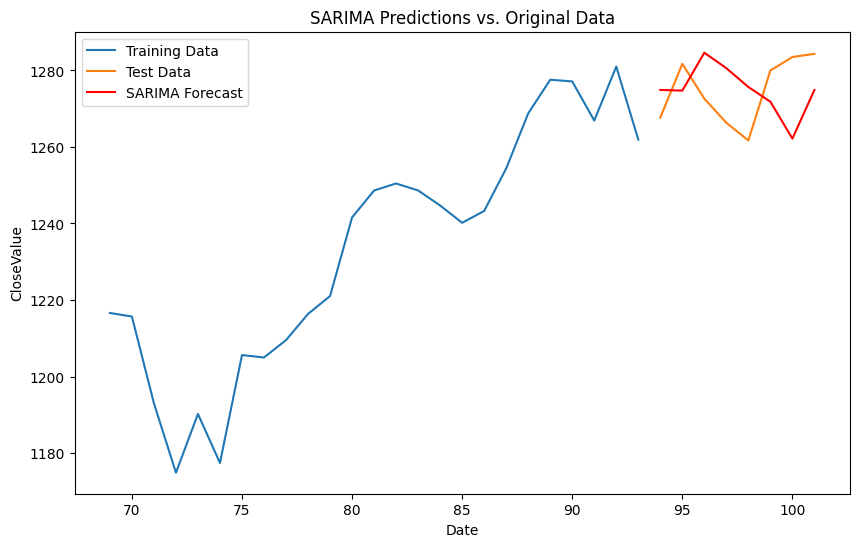

In [45]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', label='SARIMA Forecast')
plt.title('SARIMA Predictions vs. Original Data')
plt.xlabel('Date')
plt.ylabel('CloseValue')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(test, forecast)
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 816.5903522613172
R-squared (R2): -11.083349643848035


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                       ExponentialSmoothing Model Results                       
Dep. Variable:               CloseValue   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                           2378.497
Optimized:                         True   AIC                            131.884
Trend:                             None   BIC                            142.854
Seasonal:                      Additive   AICC                           152.191
Seasonal Periods:                     7   Date:                 Mon, 17 Jun 2024
Box-Cox:                          False   Time:                         23:46:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9712455                alpha                 True
smoothing_seasonal       

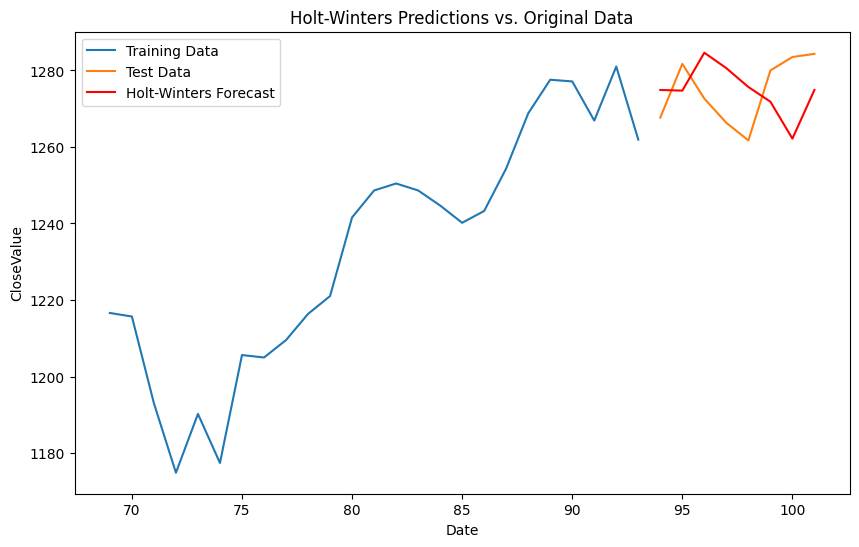

Mean Squared Error (MSE): 156.85177254080236
R-squared (R2): -1.3209860422907904
MAPE: 0.9159439954335191


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score


seasonal_periods = 7

# Fit the model
model = ExponentialSmoothing(train, 
                             seasonal='add', 
                             seasonal_periods=seasonal_periods).fit()

# Print the model summary
print(model.summary())

# Forecast values for the test set
n_forecast = len(test)
forecast = model.forecast(steps=n_forecast)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', label='Holt-Winters Forecast')
plt.title('Holt-Winters Predictions vs. Original Data')
plt.xlabel('Date')
plt.ylabel('CloseValue')
plt.legend()
plt.show()


# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(test, forecast)
print(f"R-squared (R2): {r2}")

# Calculate MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((test.to_numpy() - forecast.to_numpy()) / test.to_numpy())) * 100
print(f"MAPE: {mape}")



In [42]:
train.isnull().sum()
print(f'train: {train.isnull().sum()} \ntest: {test.isnull().sum()}')

train: 0 
test: 0


In [48]:
test.head(100)

94     1267.68
95     1281.73
96     1272.64
97     1266.32
98     1261.72
99     1280.00
100    1283.52
101    1284.35
Name: CloseValue, dtype: float64

In [49]:
forecast.head(100)

25    1274.906751
26    1274.737632
27    1284.641876
28    1280.599808
29    1275.680445
30    1271.841194
31    1262.186880
32    1274.906751
dtype: float64

In [63]:
forecast_np = forecast.to_numpy()
test_np = test.to_numpy()
print(f'{forecast_np - test_np}')

[  7.22675066  -6.99236841  12.00187586  14.2798081   13.96044533
  -8.15880585 -21.33311958  -9.44324934]


In [72]:
r2_score_1 = sum(pow((test.to_numpy() - forecast.to_numpy()),2))/sum(pow(test.to_numpy()-test.to_numpy().mean(),2))
print(r2_score_1)

2.32098604229079


In [79]:
# Calculate the mean of test values
test_mean = test.to_numpy().mean()
print(test_mean)

# Calculate the total sum of squares
SS_tot = sum(pow(test.to_numpy() - test_mean, 2))
print(SS_tot)

# Calculate the sum of squares of residuals
SS_res = sum(pow(test.to_numpy() - forecast.to_numpy(), 2))
print(SS_res)

# Calculate R-squared
r2_score_1 = 1 - (SS_res / SS_tot)
print(SS_res/SS_tot)

1274.745
540.6383999999972
1254.8141803264186
2.32098604229079


## Dự báo dài hạn 
